In [7]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline
import json 

In [8]:
#import cleaned data
movie_data=pd.read_csv("clean_data.csv")
#display data
movie_data.head()


,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,200000000,936.725,57000000,115.0,7.3,2445,2020,4,212000000,60420000,7
1,17000000,641.633,35878266,114.0,7.1,602,2020,7,18020000,38030961,7
2,75000000,361.237,201858461,109.0,7.2,6022,2020,5,79500000,213969968,7
3,90000000,337.346,419074646,124.0,7.2,5392,2020,1,95400000,444219124,7
4,42000000,253.895,30234182,110.0,7.0,3216,2020,5,44520000,32048232,7


In [9]:
#display data info
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BUDGET         5416 non-null   int64  
 1   POPULARITY     5416 non-null   float64
 2   REVENUE        5416 non-null   int64  
 3   RUNTIME        5416 non-null   float64
 4   VOTE_AVERAGE   5416 non-null   float64
 5   VOTE_COUNT     5416 non-null   int64  
 6   release_year   5416 non-null   int64  
 7   release_month  5416 non-null   int64  
 8   New_Budget     5416 non-null   int64  
 9   New_Revenue    5416 non-null   int64  
 10  New_Vote_Avg   5416 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 465.6 KB


In [10]:
#display described data
movie_data.describe()

,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
count,5.416000e+03,5416.000000,5.416000e+03,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5.416000e+03,5.416000e+03,5416.000000
mean,3.456561e+07,19.398283,9.838571e+07,109.115214,6.328619,1695.707349,2006.813516,6.750923,4.742542e+07,1.331311e+08,6.322009
std,4.263966e+07,26.162331,1.865449e+08,21.322490,0.901775,2767.024743,7.780242,3.505832,5.548877e+07,2.409670e+08,0.942131
min,1.000000e+00,0.600000,1.000000e+00,0.000000,0.000000,1.000000,1990.000000,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,7.000000e+06,9.301250,6.414526e+06,95.000000,5.800000,174.000000,2001.000000,4.000000,9.442400e+06,8.935109e+06,6.000000
50%,2.000000e+07,13.602000,3.098968e+07,105.000000,6.400000,658.500000,2008.000000,7.000000,2.698000e+07,4.312673e+07,6.000000
75%,4.500000e+07,21.862000,1.064767e+08,120.000000,6.900000,1950.750000,2013.000000,10.000000,6.319850e+07,1.452608e+08,7.000000
max,3.800000e+08,936.725000,2.797801e+09,339.000000,10.000000,27342.000000,2020.000000,12.000000,4.722640e+08,3.781250e+09,10.000000


NUMERICAL DATA
UNI VARIATE STAT


In [11]:
def Bi_Variate(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    # Draw jointplot of the two variables in the joined dataframe
    f = plt.figure(figsize=(24, 4))
    sb.jointplot(data = jointDF, x = var1, y = var2, height = 12)
    
   
   
def Correlation(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    f = plt.figure(figsize=(8, 4))
    sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
    
    
def Uni_Variate(data):
    
    data.describe()
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data = data, orient = "h", ax = axes[0])
    sb.boxplot(data = data, orient = "h", ax = axes[1])
    sb.histplot(data = data, ax = axes[2])

def PlotHist(data, var1: str, var2: str):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
    sb.histplot(data[var1], ax=ax1, kde=True)
    sb.histplot(data[var2], ax=ax2, kde=True)

def BoxPlot(movie_data, var: str):
    f = plt.figure(figsize=(24, 4))
    sb.boxplot(data = movie_data[var], orient = "h")

def ViolinPlot(movie_data, var: str):
    #Set up matplotlib figure with three subplots
    f, axes = plt.subplots(figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data=movie_data[var], orient = "h")
    
def fixskew(data):
    data = np.log(data + 1)

    f = plt.figure(figsize=(15,6))

    sb.histplot(data, kde=True)

PREDICTING REVENUE USING BUDGET

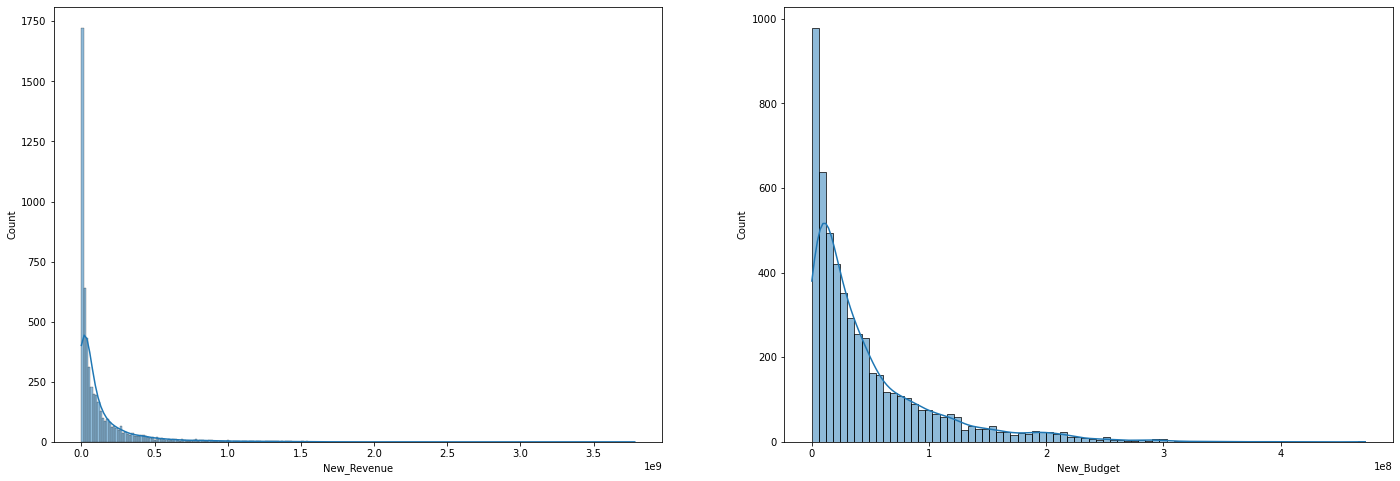

In [12]:
PlotHist(movie_data, "New_Revenue", "New_Budget")

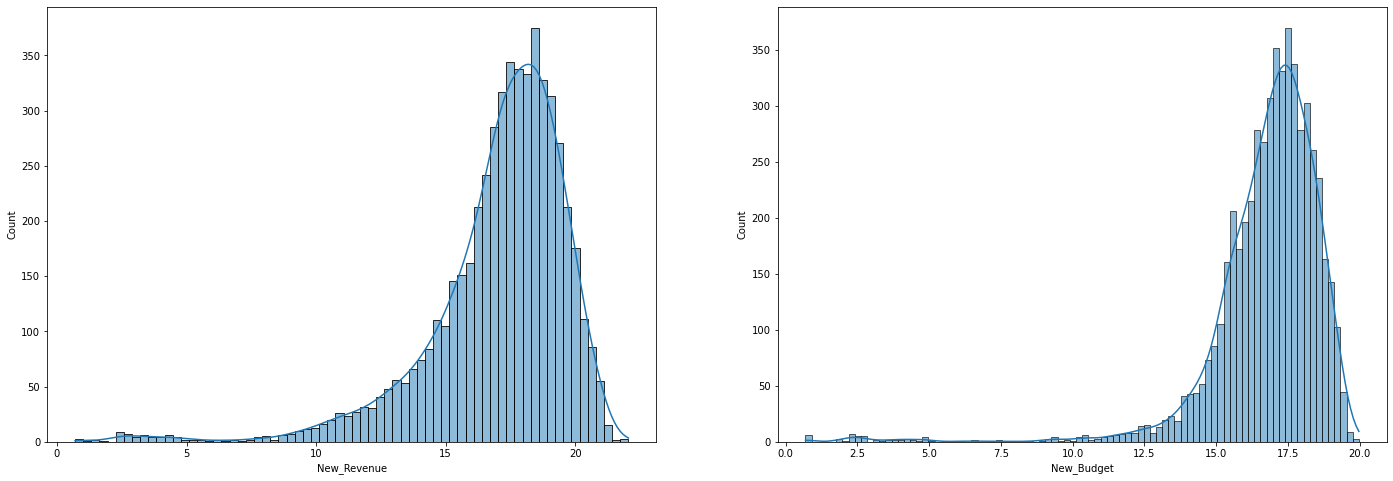

In [13]:
movie_data["New_Budget"] = np.log(movie_data["New_Budget"] + 1)
movie_data['New_Revenue'] = np.log(movie_data['New_Revenue'] + 1)

PlotHist(movie_data, 'New_Revenue', "New_Budget")

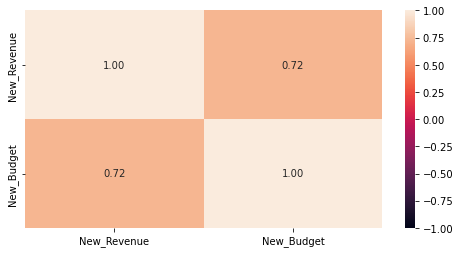

In [14]:
#Correlation between 2 variable/column
Correlation(movie_data, 'New_Revenue', "New_Budget")

<Figure size 1728x288 with 0 Axes>

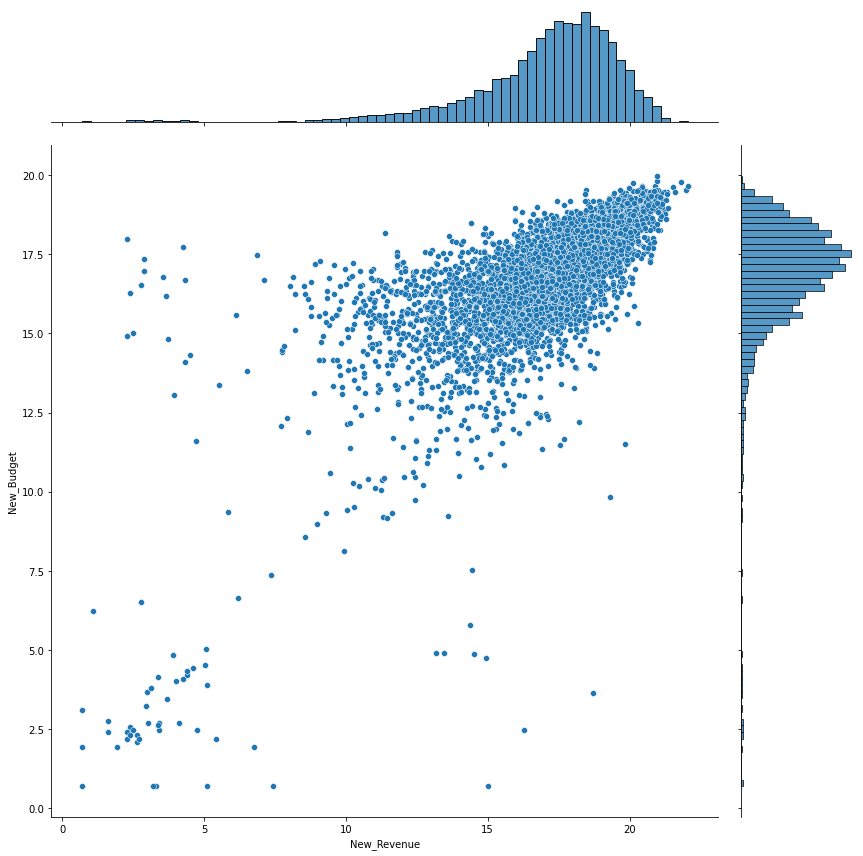

In [15]:
Bi_Variate(movie_data, 'New_Revenue', "New_Budget")

LINEAR REGRESSION FOR REVENUE AND BUDGET

In [16]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
LinearReg = LinearRegression()
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data["New_Budget"])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (4062, 1) (4062, 1)
Test Set  : (1354, 1) (1354, 1)


In [17]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [0.48303498]
Coefficients : a =  [[0.98399808]]


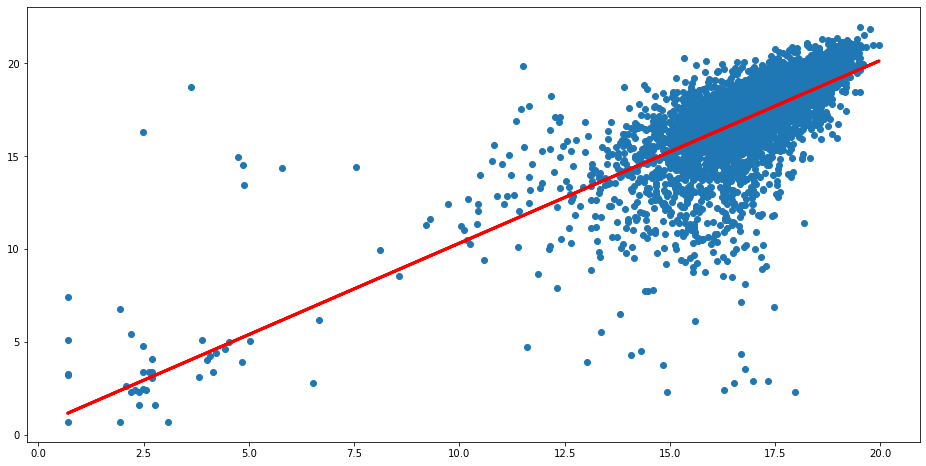

In [18]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Goodness of Fit of the Linear Regression Model

In [19]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
train_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, train_y_pred))

Explained Variance (R^2) 	: 0.5286223450734125
Mean Squared Error (MSE) 	: 3.5495369916953505


Prediction of Response based on the Predictor

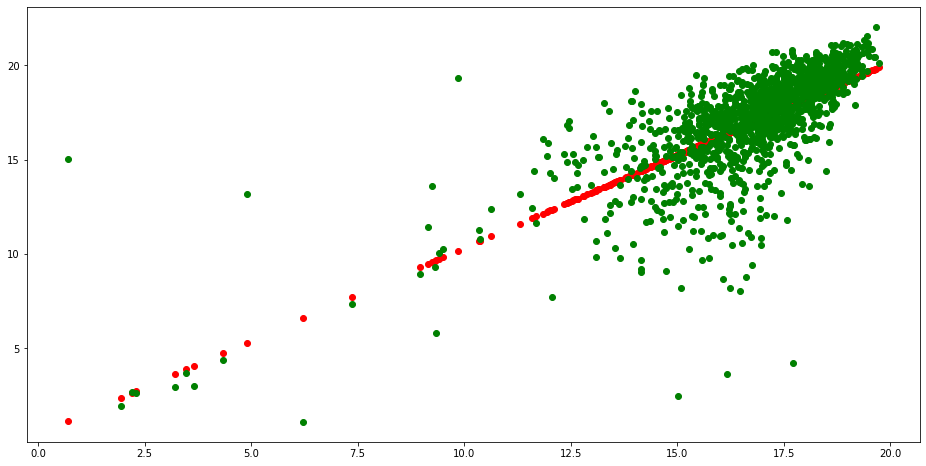

In [20]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

In [21]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y, test_y_pred))

Mean Squared Error (MSE) 	: 3.5866085277218844


In [22]:
movie_data.head()

,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,200000000,936.725,57000000,115.0,7.3,2445,2020,4,19.172097,17.916831,7
1,17000000,641.633,35878266,114.0,7.1,602,2020,7,16.706993,17.453911,7
2,75000000,361.237,201858461,109.0,7.2,6022,2020,5,18.191268,19.181346,7
3,90000000,337.346,419074646,124.0,7.2,5392,2020,1,18.373589,19.911829,7
4,42000000,253.895,30234182,110.0,7.0,3216,2020,5,17.611449,17.282753,7


2. POPULARITY

In [23]:
movie_data["POPULARITY"].describe()

count    5416.000000
mean       19.398283
std        26.162331
min         0.600000
25%         9.301250
50%        13.602000
75%        21.862000
max       936.725000
Name: POPULARITY, dtype: float64

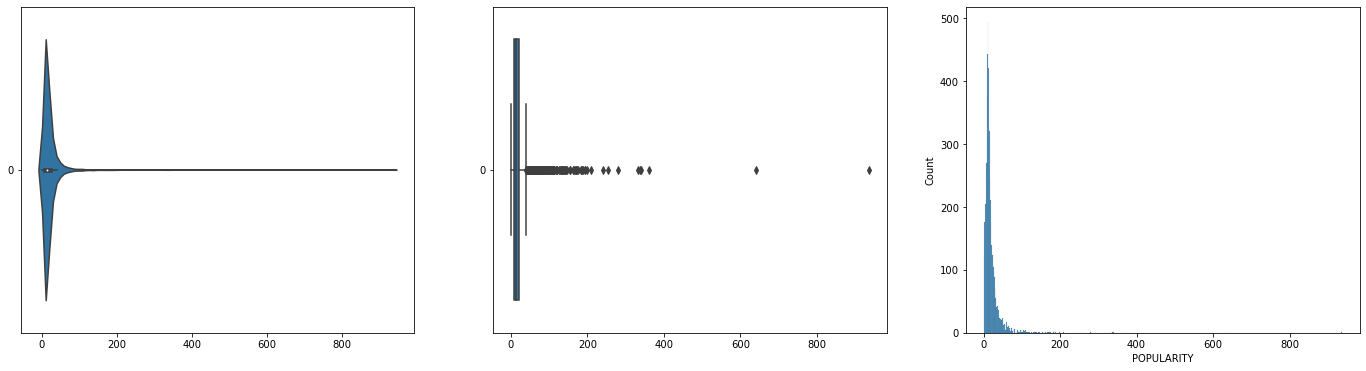

In [24]:
Uni_Variate(movie_data["POPULARITY"])

<AxesSubplot:xlabel='POPULARITY', ylabel='Count'>

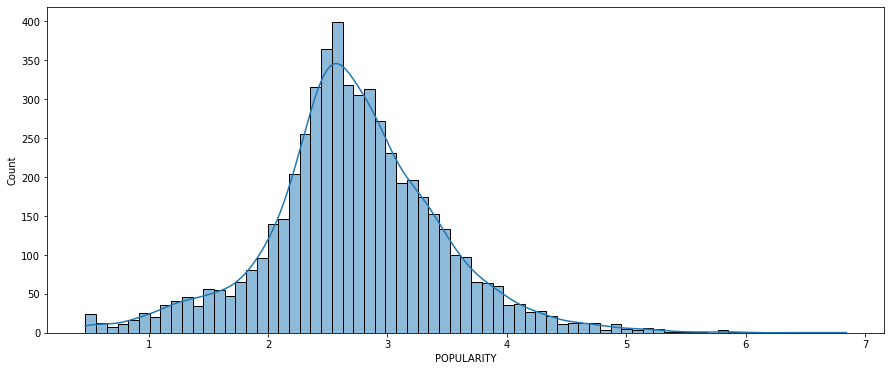

In [25]:
movie_data["POPULARITY"] = np.log(movie_data["POPULARITY"] + 1)

f = plt.figure(figsize=(15,6))

sb.histplot(movie_data["POPULARITY"], kde=True)

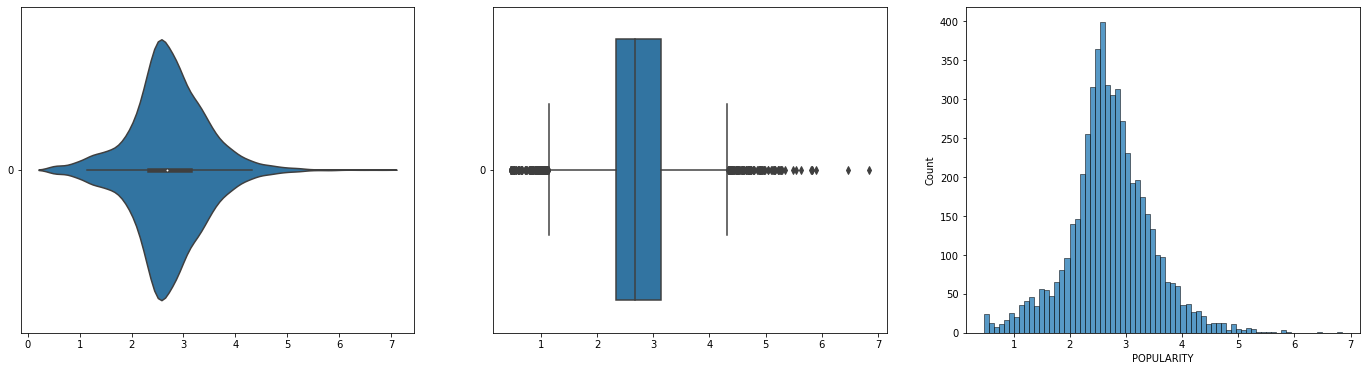

In [26]:
Uni_Variate(movie_data["POPULARITY"])

<Figure size 1728x288 with 0 Axes>

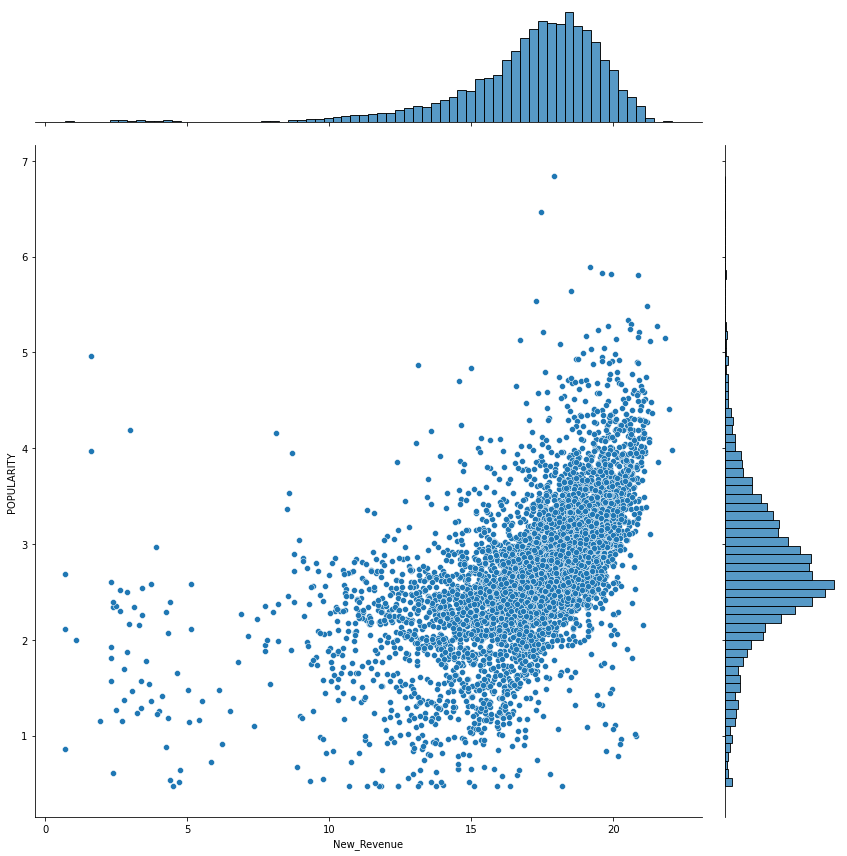

In [27]:
Bi_Variate(movie_data, 'New_Revenue', "POPULARITY")

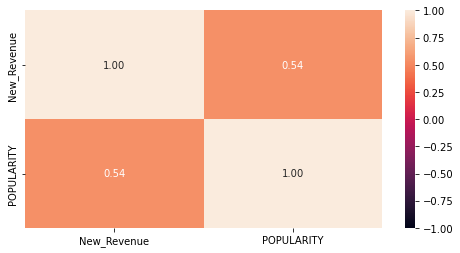

In [28]:
Correlation(movie_data, 'New_Revenue', "POPULARITY")

LINEAR REGRESSION

In [29]:
# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data['POPULARITY'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (4062, 1) (4062, 1)
Test Set  : (1354, 1) (1354, 1)


In [30]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [11.54928926]
Coefficients : a =  [[2.0184895]]


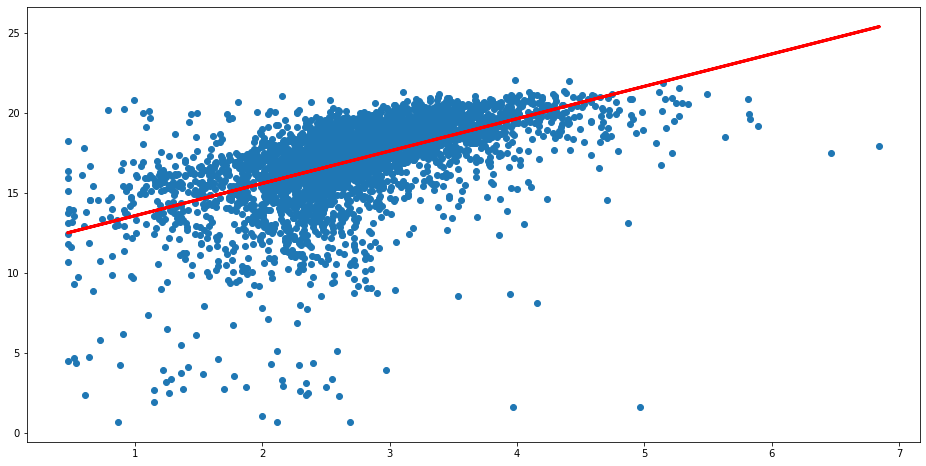

In [31]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [32]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
test_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, test_y_pred))

Explained Variance (R^2) 	: 0.29709490301970776
Mean Squared Error (MSE) 	: 5.254678972449321


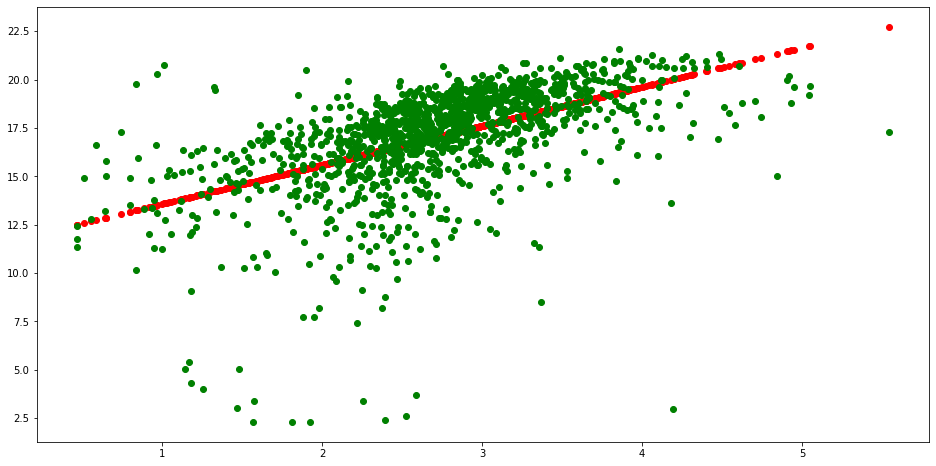

In [33]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

PREDICT REVENUE VALUE USING  VOTE_AVERAGE

In [101]:
movie_data=pd.read_csv("clean_data.csv")
movie_data.sort_values(by = 'VOTE_AVERAGE', ascending = False)
movie_data.head()

,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,200000000,936.725,57000000,115.0,7.3,2445,2020,4,212000000,60420000,7
1,17000000,641.633,35878266,114.0,7.1,602,2020,7,18020000,38030961,7
2,75000000,361.237,201858461,109.0,7.2,6022,2020,5,79500000,213969968,7
3,90000000,337.346,419074646,124.0,7.2,5392,2020,1,95400000,444219124,7
4,42000000,253.895,30234182,110.0,7.0,3216,2020,5,44520000,32048232,7


In [102]:
rate_1 = movie_data[movie_data['VOTE_AVERAGE'] <= 1] #54
rate_2 = movie_data[(movie_data['VOTE_AVERAGE'] > 1) & (movie_data['VOTE_AVERAGE'] <= 2)] #6
rate_3 = movie_data[(movie_data['VOTE_AVERAGE'] > 2) & (movie_data['VOTE_AVERAGE'] <= 3)] #21
rate_4 = movie_data[(movie_data['VOTE_AVERAGE'] > 3) & (movie_data['VOTE_AVERAGE'] <= 4)] #69
rate_5 = movie_data[(movie_data['VOTE_AVERAGE'] > 4) & (movie_data['VOTE_AVERAGE'] <= 5)] #378
rate_6 = movie_data[(movie_data['VOTE_AVERAGE'] > 5) & (movie_data['VOTE_AVERAGE'] <= 6)] #1697
rate_7 = movie_data[(movie_data['VOTE_AVERAGE'] > 6) & (movie_data['VOTE_AVERAGE'] <= 7)] #2888
rate_8 = movie_data[(movie_data['VOTE_AVERAGE'] > 7) & (movie_data['VOTE_AVERAGE'] <= 8)] #1457
rate_9 = movie_data[(movie_data['VOTE_AVERAGE'] > 8) & (movie_data['VOTE_AVERAGE'] <= 9)] #140
rate_10 = movie_data[movie_data['VOTE_AVERAGE'] >= 9] #11  #Total = 6721

In [103]:
rate_9.head()

,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
11,175000000,198.355,800526015,105.0,8.2,12316,2017,10,197575000,903793870,8
12,300000000,194.476,2046239637,149.0,8.3,19901,2018,4,331650000,2262117918,8
17,356000000,171.409,2797800564,181.0,8.3,15311,2019,4,384195200,3019386368,8
46,90000000,132.429,375540831,117.0,8.4,8100,2018,6,99495000,415160388,8
72,40000000,104.545,175302354,139.0,8.1,8722,2016,7,45732000,200423181,8


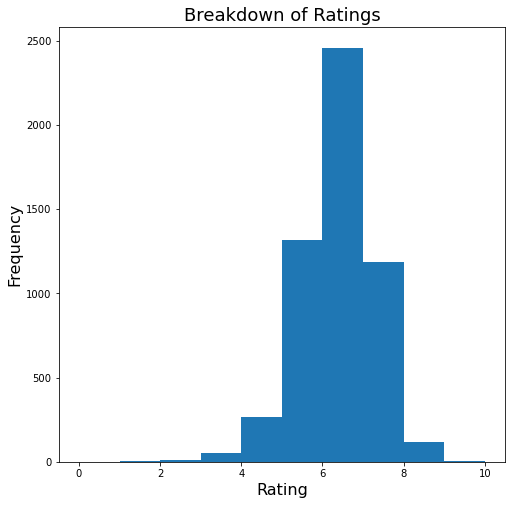

In [104]:
movie_data['VOTE_AVERAGE'].plot(kind='hist', figsize = (8,8));
plt.title('Breakdown of Ratings', fontsize = 18)
plt.xlabel('Rating', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16);

In [105]:
revenue_vote= pd.DataFrame(movie_data, columns= ['New_Revenue','New_Vote_Avg'])

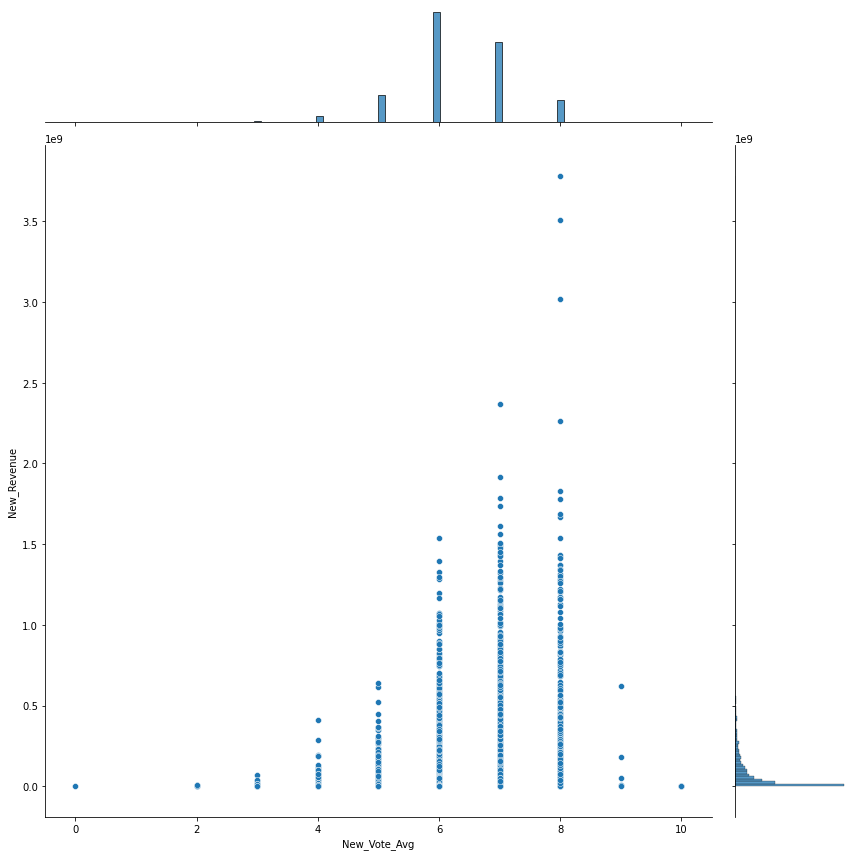

In [106]:
sb.jointplot(data = revenue_vote, x = "New_Vote_Avg", y = "New_Revenue", height = 12)

In [107]:
revenue_vote.describe()

,New_Revenue,New_Vote_Avg
count,5.416000e+03,5416.000000
mean,1.331311e+08,6.322009
std,2.409670e+08,0.942131
min,1.000000e+00,0.000000
25%,8.935109e+06,6.000000
50%,4.312673e+07,6.000000
75%,1.452608e+08,7.000000
max,3.781250e+09,10.000000


In [108]:
revenue_vote = revenue_vote.round({'VOTE_AVERAGE':0})

<AxesSubplot:xlabel='New_Vote_Avg', ylabel='New_Revenue'>

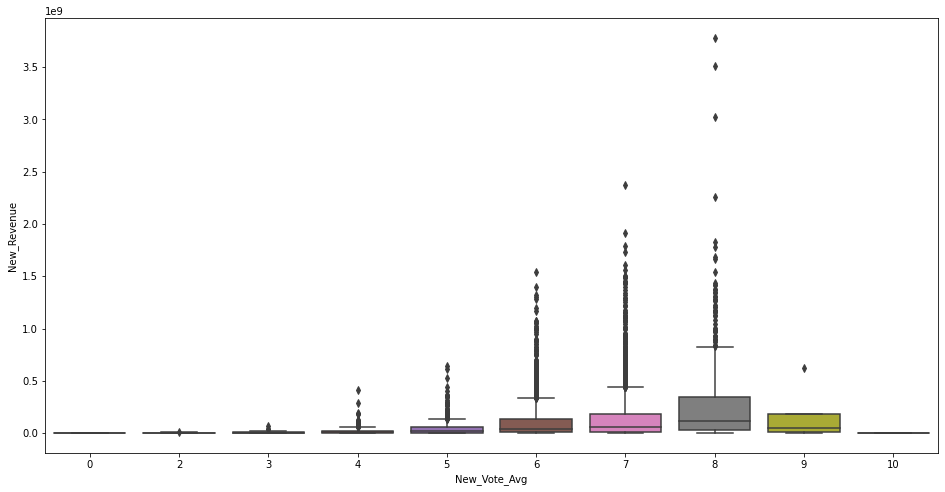

In [109]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'New_Vote_Avg', y = 'New_Revenue', data = revenue_vote)

In [110]:
count0, count2, count3, count4, count5, count6,count7, count8, count9, count10 = revenue_vote.New_Vote_Avg.value_counts()
print("Ratio of classes is Y : N = ", count0, ":", count2,":", count3,":", count4,":", count5,":", count6,":", count7,":", count8,":", count9,":", count10)

Ratio of classes is Y : N =  2404 : 1750 : 596 : 477 : 141 : 29 : 7 : 6 : 5 : 1


In [117]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish

# Decision Tree with max depth = 2
tree_CA_SP_d2 = DecisionTreeClassifier(max_depth = 2)

# Decision Tree with max depth = 4
tree_CA_SP_d6 = DecisionTreeClassifier(max_depth = 6)

In [118]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(revenue_vote['New_Vote_Avg'])
X = pd.DataFrame(revenue_vote['New_Revenue'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (4332, 1) (4332, 1)
Test Set  : (1084, 1) (1084, 1)


In [119]:
# Fit the tree with max depth 2
tree_CA_SP_d2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [120]:
# Fit the tree with max depth 4
tree_CA_SP_d6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

[Text(334.8, 543.6, 'New_Revenue <= 310383216.0\ngini = 0.677\nsamples = 4332\nvalue = [6, 23, 111, 481, 1922, 1405, 377, 4, 3]\nclass = 5'),
 Text(167.4, 326.16, 'New_Revenue <= 1547198.0\ngini = 0.672\nsamples = 3807\nvalue = [6, 23, 110, 471, 1757, 1165, 269, 3, 3]\nclass = 5'),
 Text(83.7, 108.72000000000003, 'gini = 0.662\nsamples = 523\nvalue = [4, 12, 34, 99, 271, 88, 11, 1, 3]\nclass = 5'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.668\nsamples = 3284\nvalue = [2, 11, 76, 372, 1486, 1077, 258, 2, 0]\nclass = 5'),
 Text(502.20000000000005, 326.16, 'New_Revenue <= 678989888.0\ngini = 0.65\nsamples = 525\nvalue = [0, 0, 1, 10, 165, 240, 108, 1, 0]\nclass = 6'),
 Text(418.5, 108.72000000000003, 'gini = 0.639\nsamples = 352\nvalue = [0, 0, 1, 10, 130, 158, 52, 1, 0]\nclass = 6'),
 Text(585.9, 108.72000000000003, 'gini = 0.63\nsamples = 173\nvalue = [0, 0, 0, 0, 35, 82, 56, 0, 0]\nclass = 6')]

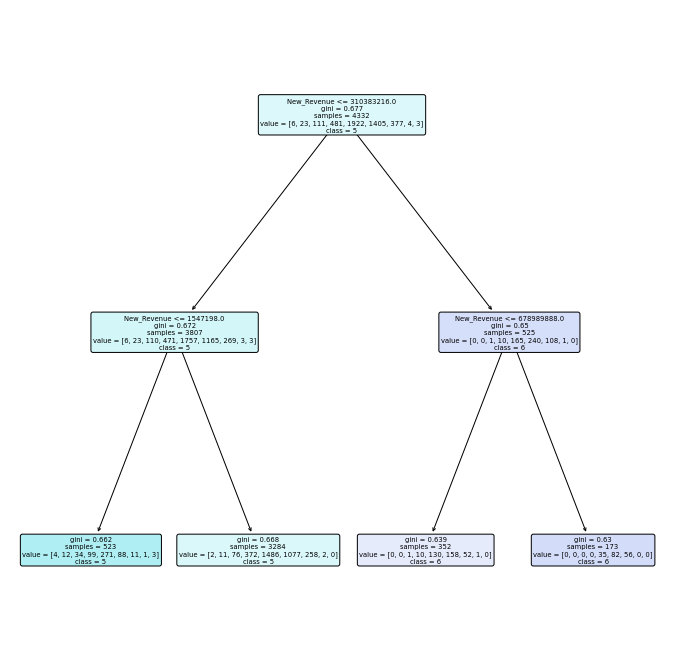

In [121]:
# Plot the tree with max depth 2
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree_CA_SP_d2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","2","3","4","5","6","7","8","9","10"])

[Text(2881.150568181818, 5047.714285714285, 'New_Revenue <= 310383216.0\ngini = 0.677\nsamples = 4332\nvalue = [6, 23, 111, 481, 1922, 1405, 377, 4, 3]\nclass = 5'),
 Text(1299.8863636363635, 4271.142857142857, 'New_Revenue <= 1547198.0\ngini = 0.672\nsamples = 3807\nvalue = [6, 23, 110, 471, 1757, 1165, 269, 3, 3]\nclass = 5'),
 Text(570.6818181818181, 3494.5714285714284, 'New_Revenue <= 1495026.5\ngini = 0.662\nsamples = 523\nvalue = [4, 12, 34, 99, 271, 88, 11, 1, 3]\nclass = 5'),
 Text(507.27272727272725, 2718.0, 'New_Revenue <= 5800.5\ngini = 0.66\nsamples = 519\nvalue = [4, 12, 34, 95, 271, 88, 11, 1, 3]\nclass = 5'),
 Text(253.63636363636363, 1941.4285714285716, 'New_Revenue <= 33.5\ngini = 0.745\nsamples = 65\nvalue = [0, 2, 8, 19, 24, 8, 3, 0, 1]\nclass = 5'),
 Text(126.81818181818181, 1164.8571428571431, 'New_Revenue <= 19.5\ngini = 0.666\nsamples = 26\nvalue = [0, 1, 0, 6, 13, 4, 2, 0, 0]\nclass = 5'),
 Text(63.40909090909091, 388.2857142857147, 'gini = 0.715\nsamples = 20\n

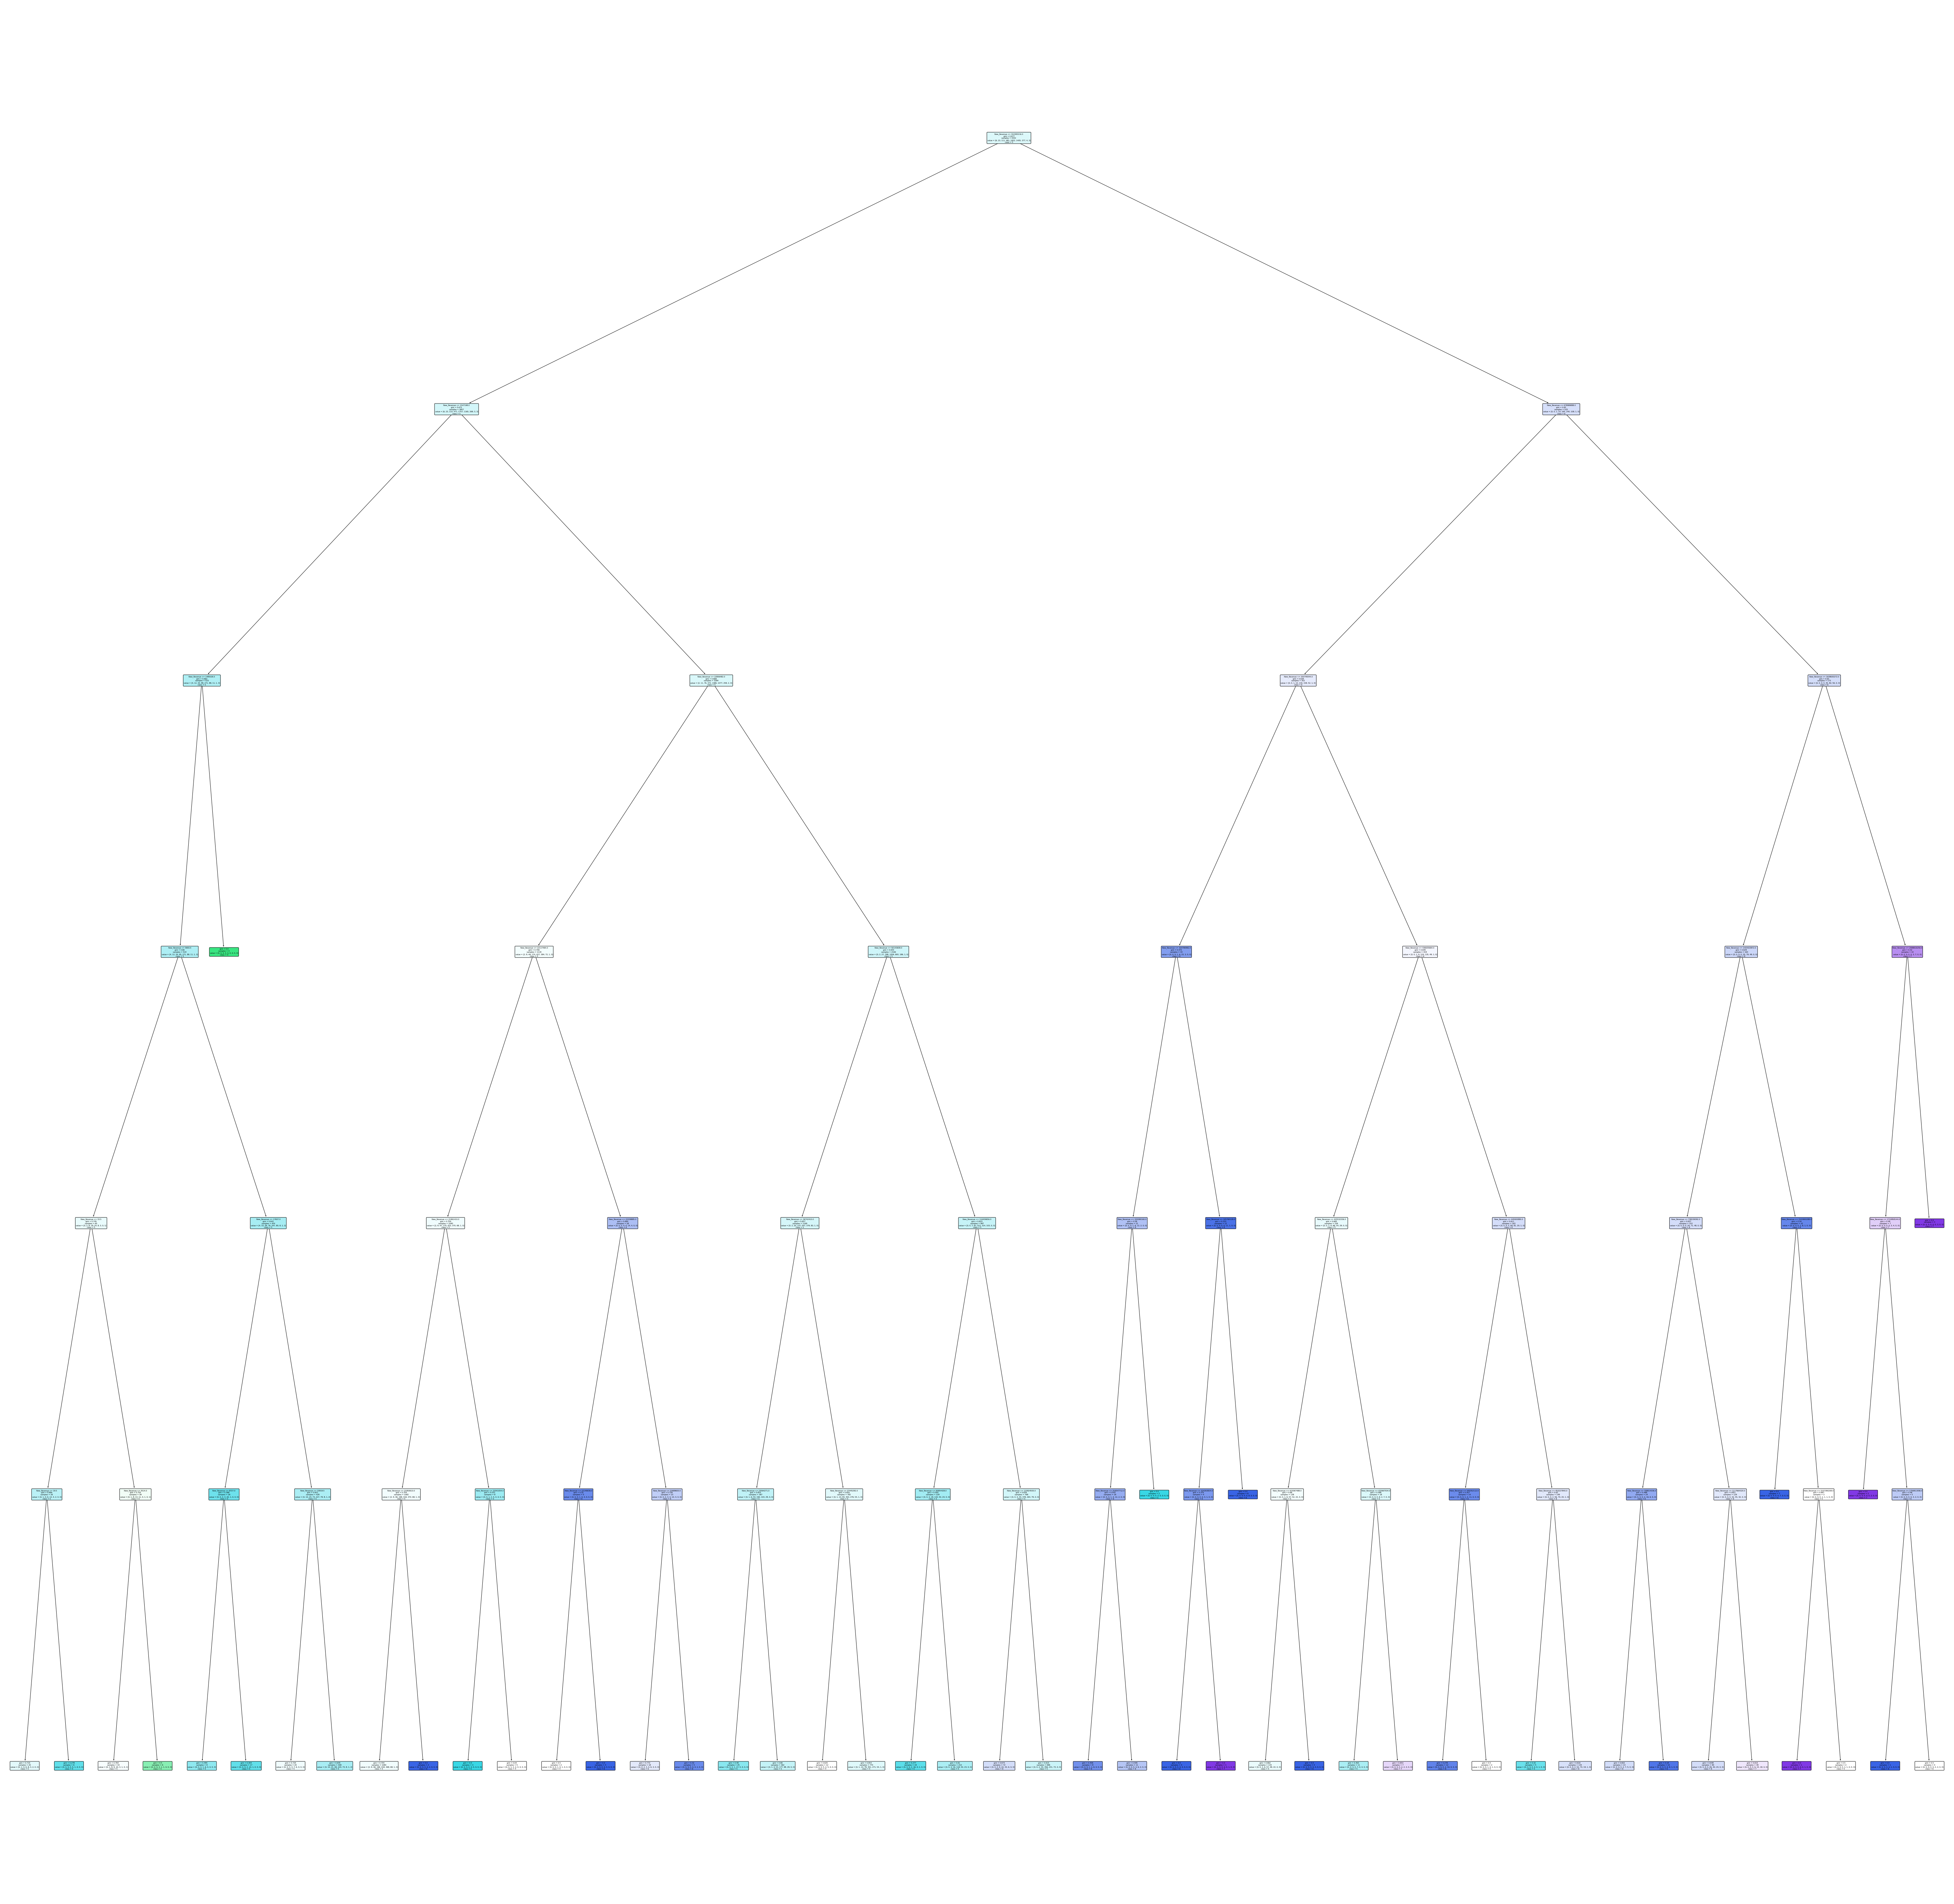

In [122]:
# Plot the tree with max depth 2
from sklearn.tree import plot_tree

f = plt.figure(figsize=(100,100))
plot_tree(tree_CA_SP_d6, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","2","3","4","5","6","7","8","9","10"])